# Does chess have it right?

Let's examine the formula chess use to calculate a player's probability of winning:

$$win\_ prob = \frac{1}{1+10^{-(\frac{ELO_1-ELO_2}{400})}}$$

Why is it set up this way?
The idea is that it is modeled on the logistic cumulative distribution function (LCDF). Lets look at the standard form of this function. It has the formula:

$$F(x;\mu,s) = \frac{1}{1+e^{-(\frac{x-\mu}{s})}}$$

where $x$ is the random variable, $\mu$ is the mean, and $s$ is a scalar proportional to the standard deviation. If we want to make an ELO system in this form, the random variable would be the difference between the ELO ratings of two teams. The mean win propability would be $0$ (with no home ground advantage), and the value of $s$ depends on the type of game. To explain how $s$ gets it's value in ELO systems, consider the following example.

#### Example.
Let's assume that the ELO ratings for players accross different sports are comparable. We will also assume that most of the games are played between players of somewhat comparable ELO ratings. For example, say that the best players in a particular chess and curling tournament have a rating of around 2000, and the worst have a rating of around 1000. We could squash the ELO spread down to between 1510 and 1490 (provided we use lots of decimals) but the former is easy on the eye. If the win probability were modelled using an LCDF, how should their curves look?

Lets have a look at the options:

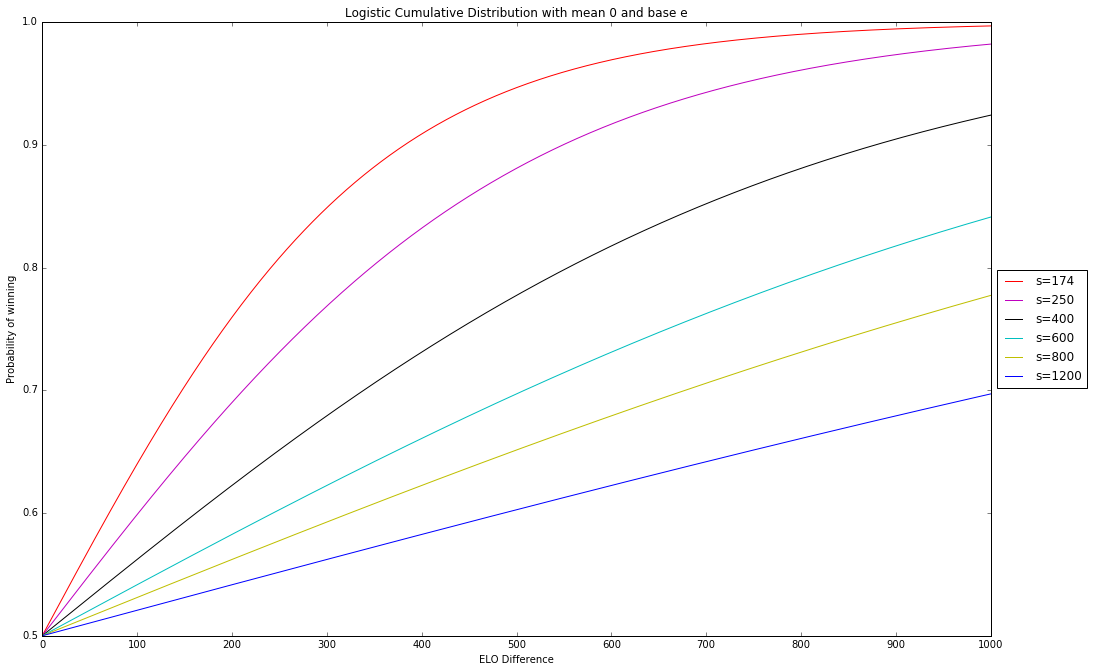

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
%matplotlib inline

def f(x,s):
    return 1 / float(1 + math.exp(-x/s))

x = np.arange(0.,2000.)
y1= [f(i,174) for i in x]
y2= [f(i,250) for i in x]
y3= [f(i,400) for i in x]
y4= [f(i,600) for i in x]
y5= [f(i,800) for i in x]
y6= [f(i,1200) for i in x]


line,ax = plt.subplots()
l1 = ax.plot(x,y1,'r-',label='s=174')
l2 = ax.plot(x,y2,'m-',label='s=250')
l3 = ax.plot(x,y3,'k-',label='s=400')
l4 = ax.plot(x,y4,'c-',label='s=600')
l5 = ax.plot(x,y5,'y-',label='s=800')
l6 = ax.plot(x,y6,'b-',label='s=1200')

# legend = ax.legend(loc = 'lower right')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis([0,500,0.5,1])
plt.xlabel('ELO Difference')
plt.ylabel('Probability of winning')
plt.title('Logistic Cumulative Distribution with mean 0 and base e')
line.set_size_inches(17, 11)
ticks = plt.xticks(np.arange(0, 1100, 100))

Since curling is such a crazy game, even the best player facing the worst player can't pull that much of an edge, and so I would expect the game to have an $s$ value close to $800$ as seen above. In chess on the other hand, the top player will almost never lose to the bottom player, so the $s$ value for chess would be much lower. Remember this graph is using base $e$ and not $s$ so we can't yet compare the chess $s$ value of $400$ to the graph above. 

So where do chess get the value $400$ from and how come they use a $10$ instead of $e$ in their formula? Is it still a logistic distribution? 

It turns out you can use any value in place of $e$ and the function remains a logistic distribution, just with a different $s$ value. Lets take the forumla that chess use, prove that it is a logistic function, and find out where the 400 comes from. Let $x = ELO_1-ELO_2$. Then we have:


\begin{align}
win\_ prob &= \frac{1}{1+10^{-(\frac{x}{400})}} \\
&= \frac{1}{1+10^{-(\frac{x\log_{10}e}{400\log_{10}e})}} \\
&= \frac{1}{1+10^{\log_{10}e.-(\frac{x}{400\log_{10}e})}} \\
&= \frac{1}{1+e^{-(\frac{x}{400\log_{10}e})}}
\end{align}

Therefore, the win probability formula that chess use is a LCDF with mean $0$ and $s = 400\log_{10}e \approx 174$. This is shown as the red line in the graph above. We finally have this equivalence:

So we can use any value in place of $e$ that we like, and still maintain the structure of the logistic distribution (albeit with a different value of $s$).


#### The question is now this: For modelling a sport using ELO and the logistic distribution, can we use any value for $s$ in the LCDF?

Check out tomorrow's blog post entitled "Get Your Own Variable" to find out.

Is there a problem with the model shown above when we expand it to sports with higher variance than chess (like curling)? In a competition like the NRL with not many teams (16) and not a large skill difference between the teams, we will almost never expect a team to win with more than 80% probability. So if the best and the worst team in the competition have an ELO difference of 1000, then, looking at the graph, we end with an $s$ value of around $750$ (using base $e$). But this is almost a straight line between $0$ and $100$. Let's wait for the maths to tell us in the next document. If we can prove that we can replicate any LCDF with a fixed random variable and value of $s$ with another LCDF with a different random variable and $s$, then this problem doesn't exist. Find out in "Get Your Own Variable".